<blockquote>
    <h1>Exercise 3.15</h1>
    <p>This problem involves the <code>Boston</code> data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.</p>
    <ol>
        <li>For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.</li>
        <li>Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0: \beta_j = 0$?</li>
        <li>How do your results from 1 compare to your results from 2? Create a plot displaying the univariate regression coefficients from 1 on the $x$-axis, and the multiple regression coefficients from 2 on the $y$-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the $x$-axis, and its coefficient estimate in the multiple linear regression model is shown on the $y$-axis.</li>
        <li>Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form
        $$
        Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon \,.
        $$</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm

<h2>Data Exploration</h2>
<p>We first read the comma-separated values (csv) <code>Boston</code> file into a pandas DataFrame, for which we will show the top five rows.</p>

In [2]:
df = pd.read_csv("../../DataSets/Boston/Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<p>We know from our <a href="../../DataSets/Boston/Exploration.ipynb">Eploration notebook</a> for the <code>Boston</code> file that the associated data has no obvious missing values. Thus, we don't need to clean any data.</p>

<h3>Exercise 3.15.1</h3>
<blockquote>
    <i>For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.</i>
</blockquote>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           5.51e-06
Time:                        15:30:07   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.000       3.634       5.273
zn            -0.0739      0.016     -4.594      0.000      -0.106      -0.042
==============================================================================
Omnibus:                      567.443   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32753.004
Skew:                           5.257   Prob(JB):                         0.00
Kurtosis:                      40.986   Cond. No.                         28.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.45e-21
Time:                        15:30:07   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0637      0.667     -3.093      0.002      -3.375      -0.753
indus          0.5098      0.051      9.991      0.000       0.410       0.610
==============================================================================
Omnibus:                      585.118   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41418.938
Skew:                           5.449   Prob(JB):                         0.00
Kurtosis:                      45.962   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sat, 04 Jan 2020   Prob (F-statistic):              0.209
Time:                        15:30:07   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7444      0.396      9.453      0.000       2.966       4.523
chas          -1.8928      1.506     -1.257      0.209      -4.852       1.066
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                         3.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           3.75e-23
Time:                        15:30:07   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.7199      1.699     -8.073      0.000     -17.059     -10.381
nox           31.2485      2.999     10.419      0.000      25.356      37.141
==============================================================================
Omnibus:                      591.712   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43138.106
Skew:                           5.546   Prob(JB):                         0.00
Kurtosis:                      46.852   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           6.35e-07
Time:                        15:30:07   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4818      3.364      6.088      0.000      13.872      27.092
rm            -2.6841      0.532     -5.045      0.000      -3.729      -1.639
==============================================================================
Omnibus:                      575.717   Durbin-Watson:                   0.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36658.093
Skew:                           5.345   Prob(JB):                         0.00
Kurtosis:                      43.305   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           2.85e-16
Time:                        15:30:07   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7779      0.944     -4.002      0.000      -5.633      -1.923
age            0.1078      0.013      8.463      0.000       0.083       0.133
==============================================================================
Omnibus:                      574.509   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36741.903
Skew:                           5.322   Prob(JB):                         0.00
Kurtosis:                      43.366   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           8.52e-19
Time:                        15:30:07   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4993      0.730     13.006      0.000       8.064      10.934
dis           -1.5509      0.168     -9.213      0.000      -1.882      -1.220
==============================================================================
Omnibus:                      576.519   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37426.729
Skew:                           5.348   Prob(JB):                         0.00
Kurtosis:                      43.753   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           2.69e-56
Time:                        15:30:08   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2872      0.443     -5.157      0.000      -3.158      -1.416
rad            0.6179      0.034     17.998      0.000       0.550       0.685
==============================================================================
Omnibus:                      656.459   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75417.007
Skew:                           6.478   Prob(JB):                         0.00
Kurtosis:                      61.389   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           2.36e-47
Time:                        15:30:08   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5284      0.816    -10.454      0.000     -10.131      -6.926
tax            0.0297      0.002     16.099      0.000       0.026       0.033
==============================================================================
Omnibus:                      635.377   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63763.835
Skew:                           6.156   Prob(JB):                         0.00
Kurtosis:                      56.599   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           2.94e-11
Time:                        15:30:08   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.6469      3.147     -5.607      0.000     -23.830     -11.464
ptratio        1.1520      0.169      6.801      0.000       0.819       1.485
==============================================================================
Omnibus:                      568.053   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34221.853
Skew:                           5.245   Prob(JB):                         0.00
Kurtosis:                      41.899   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     87.74
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           2.49e-19
Time:                        15:30:08   Log-Likelihood:                -1765.8
No. Observations:                 506   AIC:                             3536.
Df Residuals:                     504   BIC:                             3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5535      1.426     11.609      0.000      13.752      19.355
black         -0.0363      0.004     -9.367      0.000      -0.044      -0.029
==============================================================================
Omnibus:                      594.029   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44041.935
Skew:                           5.578   Prob(JB):                         0.00
Kurtosis:                      47.323   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           2.65e-27
Time:                        15:30:08   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3305      0.694     -4.801      0.000      -4.694      -1.968
lstat          0.5488      0.048     11.491      0.000       0.455       0.643
==============================================================================
Omnibus:                      601.306   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49918.826
Skew:                           5.645   Prob(JB):                         0.00
Kurtosis:                      50.331   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.17e-19
Time:                        15:30:08   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7965      0.934     12.628      0.000       9.961      13.632
medv          -0.3632      0.038     -9.460      0.000      -0.439      -0.288
==============================================================================
Omnibus:                      558.880   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32740.044
Skew:                           5.108   Prob(JB):                         0.00
Kurtosis:                      41.059   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


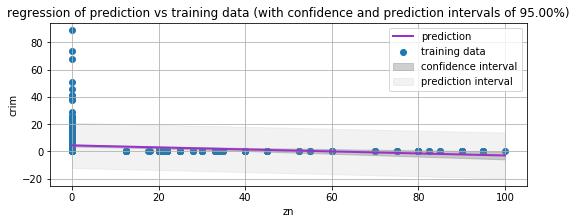

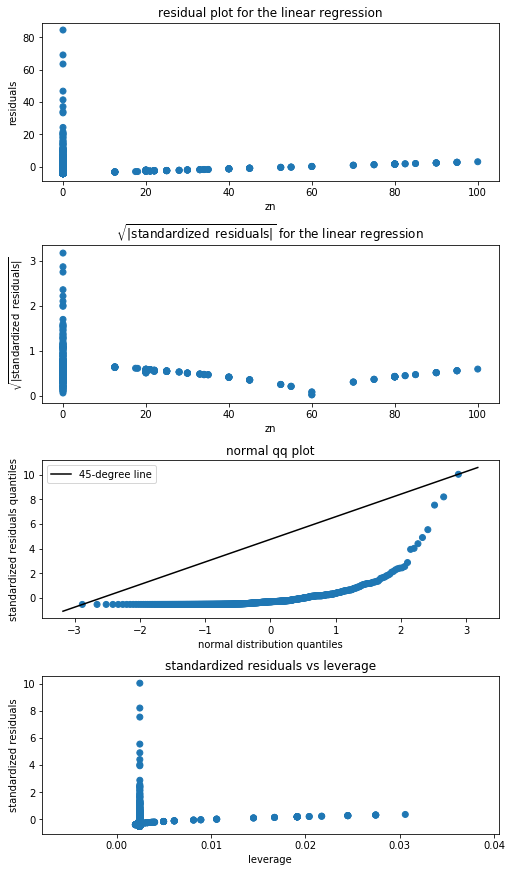

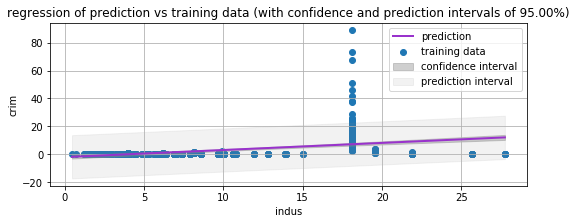

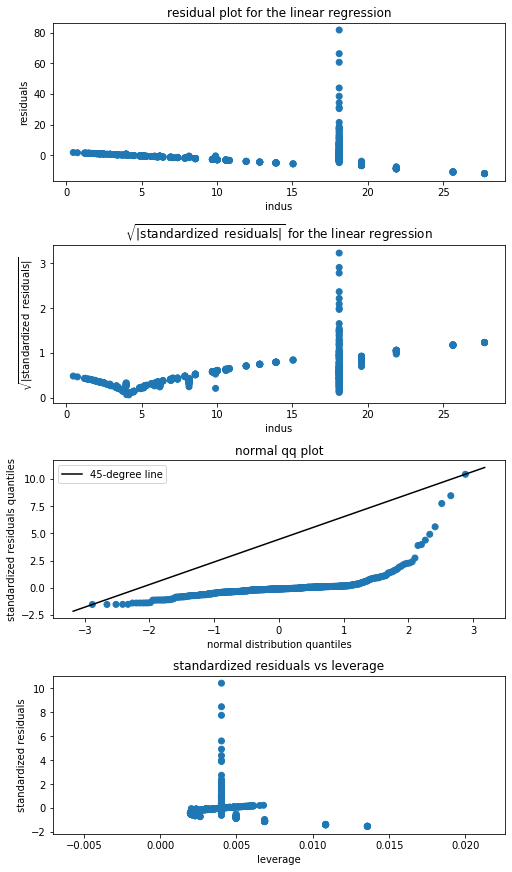

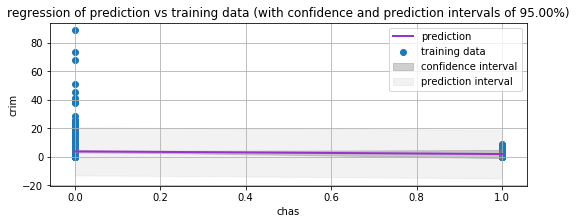

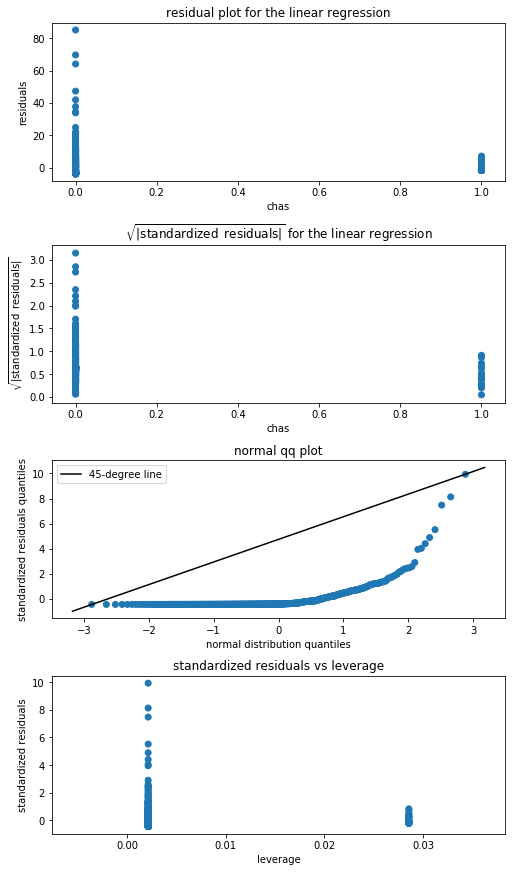

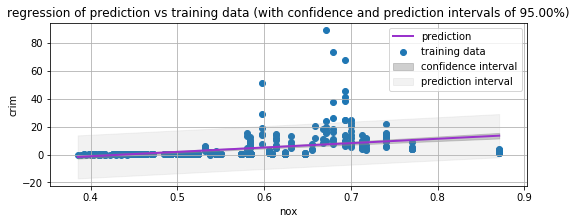

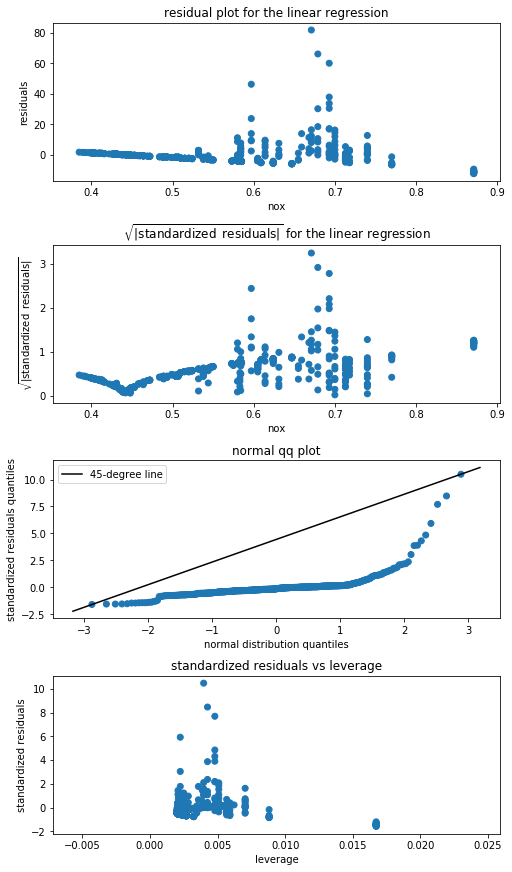

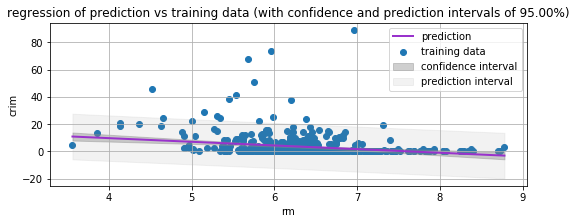

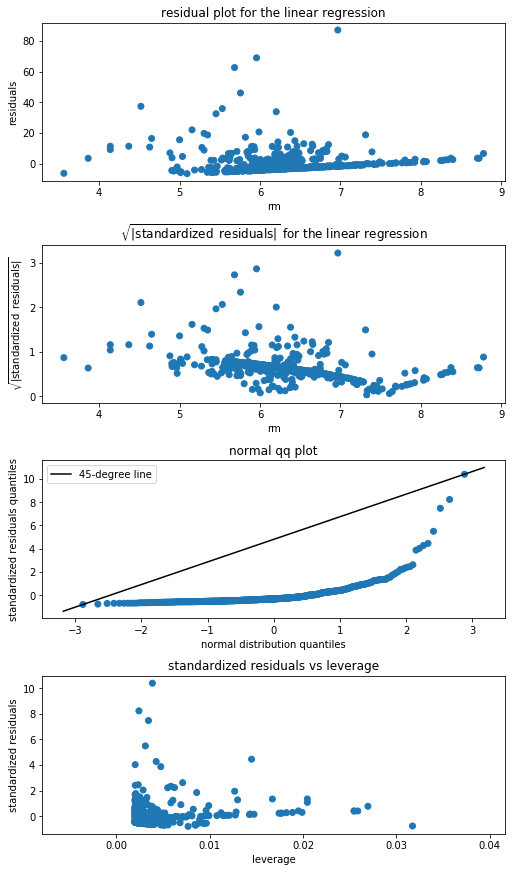

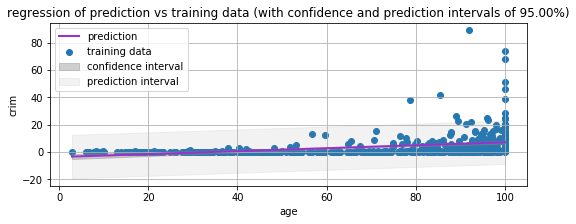

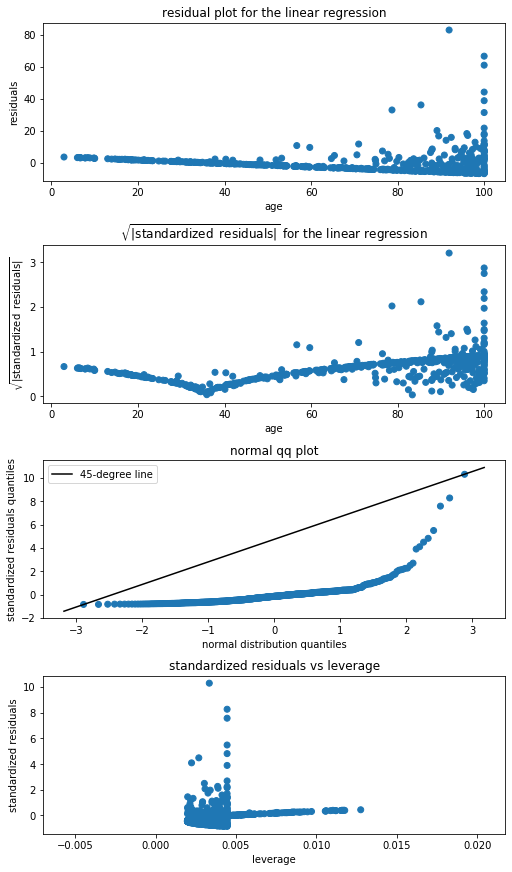

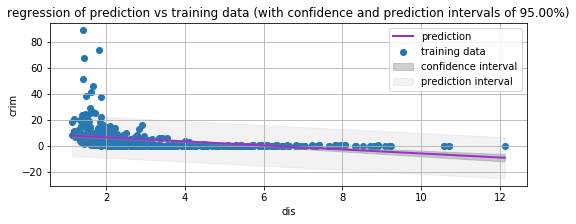

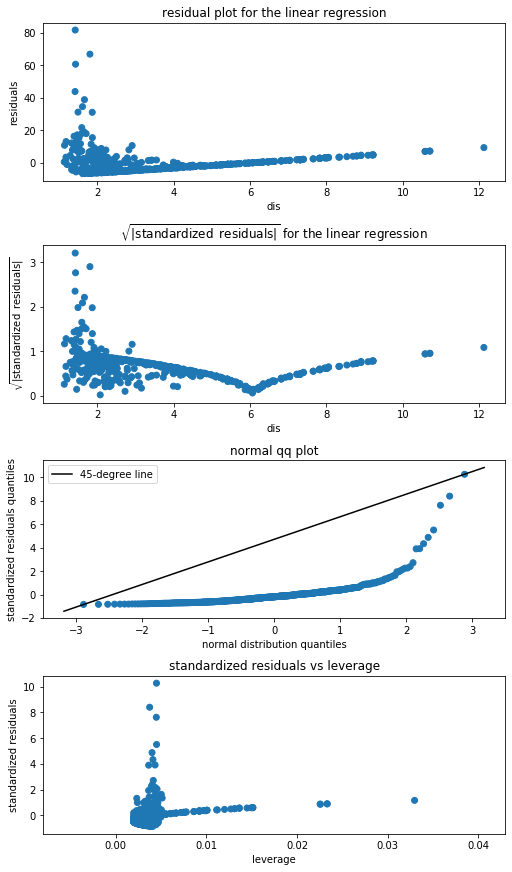

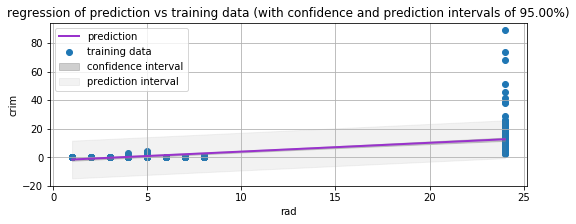

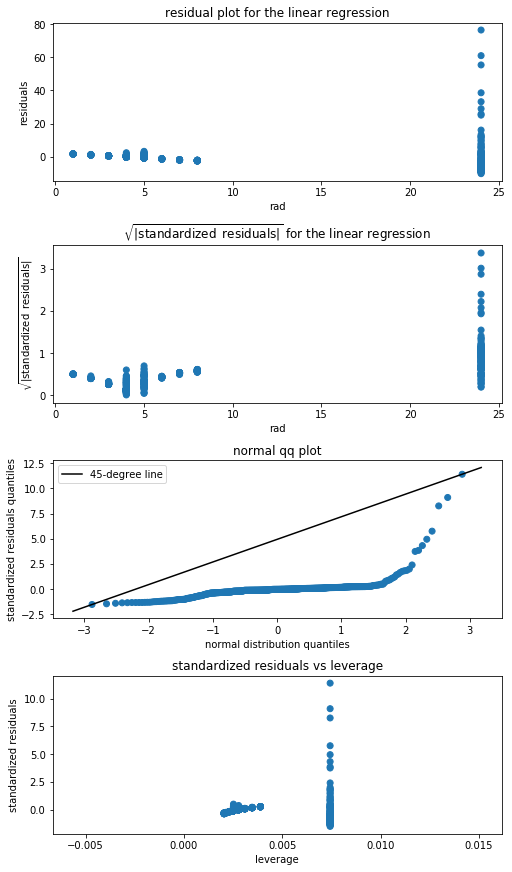

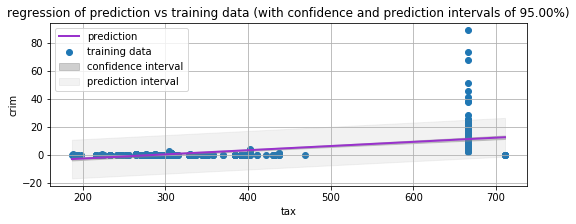

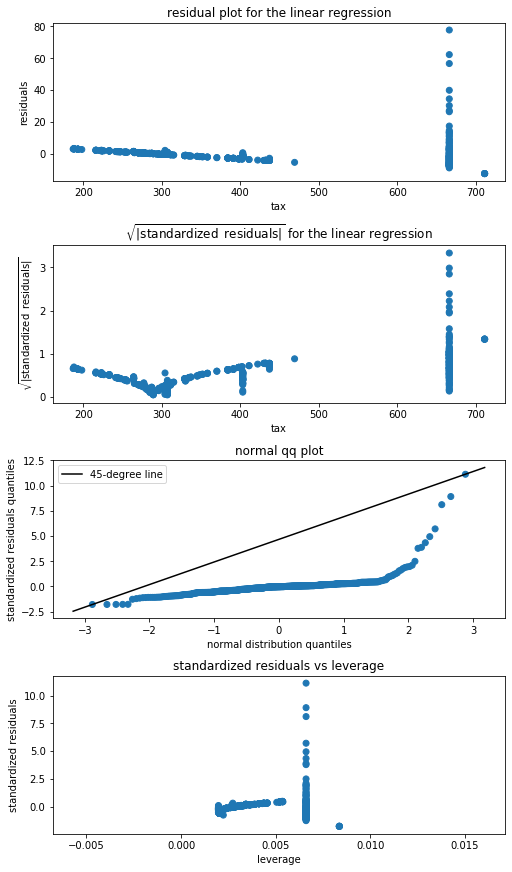

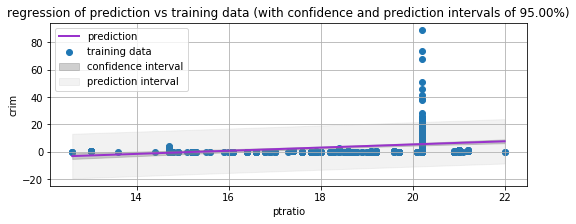

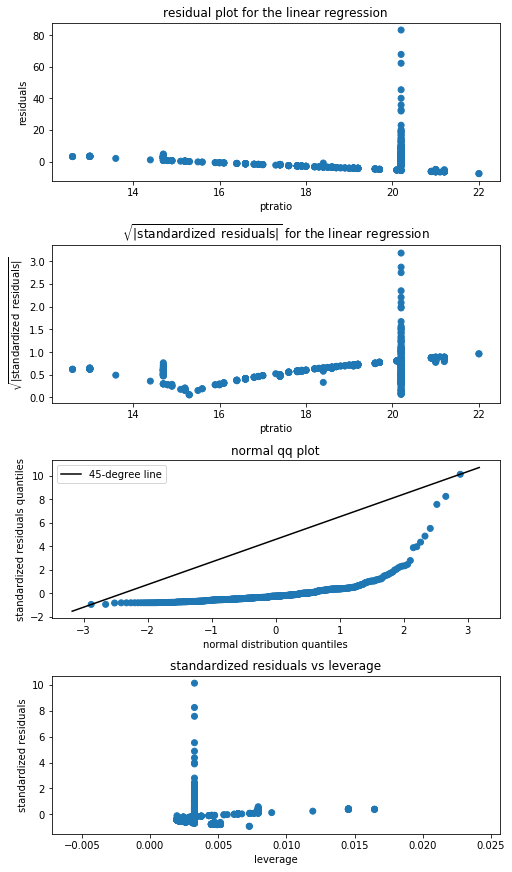

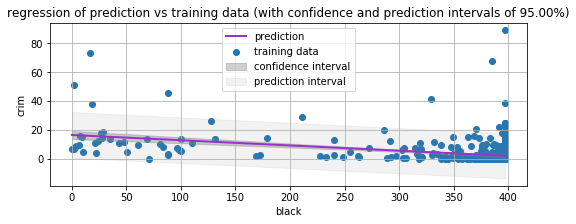

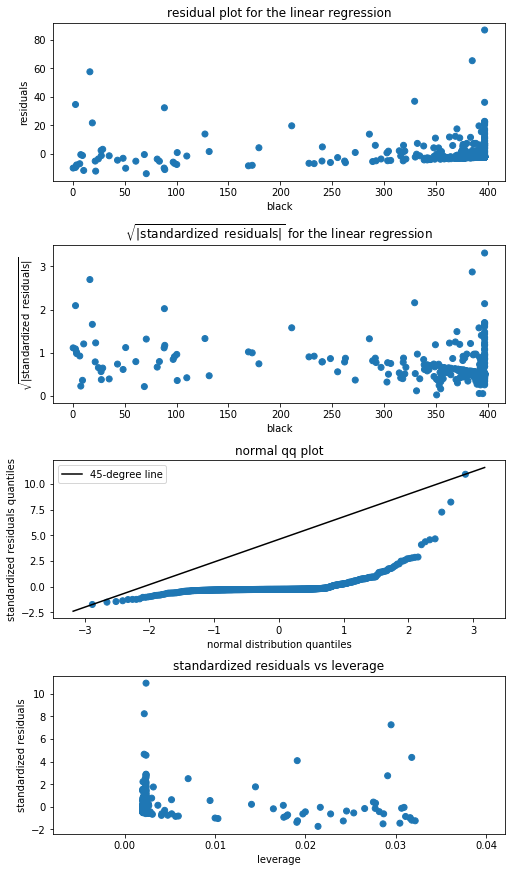

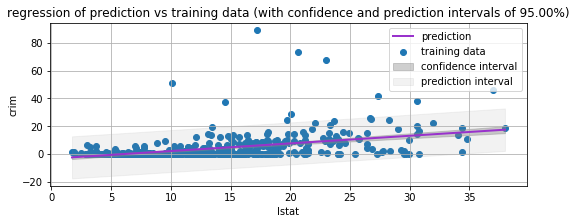

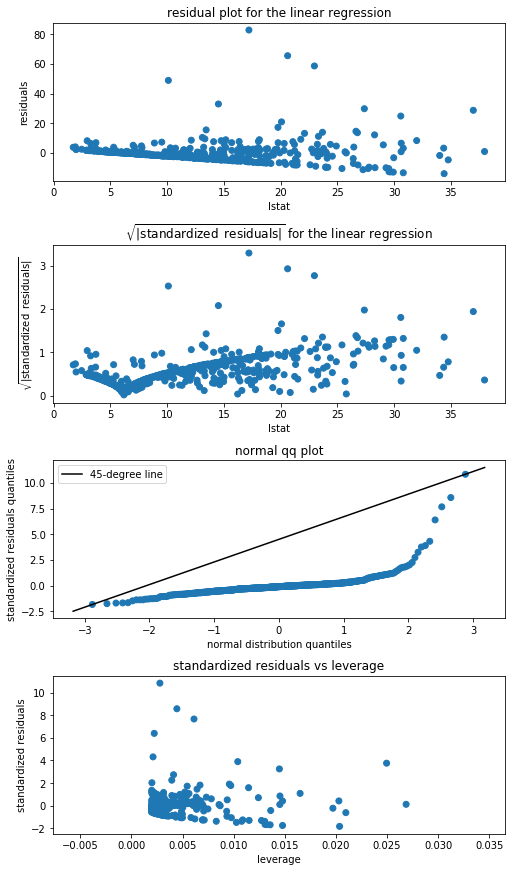

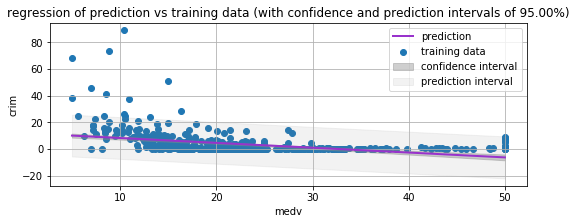

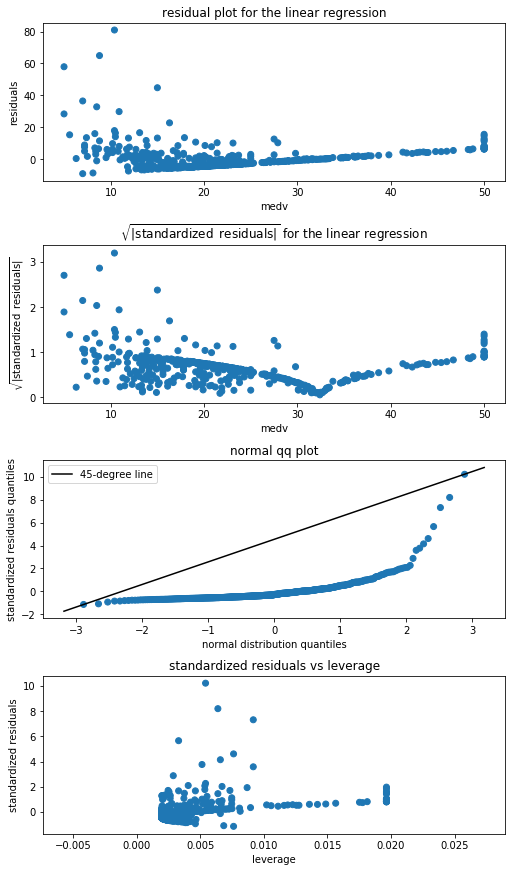

In [3]:
if not 'Intercept' in df.columns:
    df.insert(0, 'Intercept', 1)
targetColumn = ['crim']
descriptiveColumns = removeColumnsFromList(df, targetColumn)

df_Y = df[targetColumn]
params_simple = {}  # will use this to create a pandas Series later
r_squared_simple = {'r_squared': {}, 'adj_r_squared': {}} # will use this to create a pandas Series later
for variable_name in descriptiveColumns:
    if variable_name == 'Intercept':
        continue
        
    df_X = df[['Intercept', variable_name]]
    model = sm.OLS(df_Y, df_X)
    fitted = model.fit()
    fitted.summary()
    createLinearRegressionPlot(df_X, df_Y, fitted_model=fitted, width=8)
    createResidualPlots(df_X, df_Y, fitted_model=fitted)
    
    params_simple[variable_name] = fitted.params.loc[variable_name]
    r_squared_simple['r_squared'][variable_name] = fitted.rsquared
    r_squared_simple['adj_r_squared'][variable_name] = fitted.rsquared_adj

<p>Looking solely at the associated $p$ values, we see that $\mathrm{chas}$ is the only variable with a large $p$ value. However, the regression and diagnostic plots of model provide evidence that none of the variables have a linear relationhsip with $\mathrm{crim}$.</p>

<h3>Exercise 3.15.2</h3>
<blockquote>
    <i>Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0: \beta_j = 0$?</i>
</blockquote>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.57e-56
Time:                        15:30:26   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

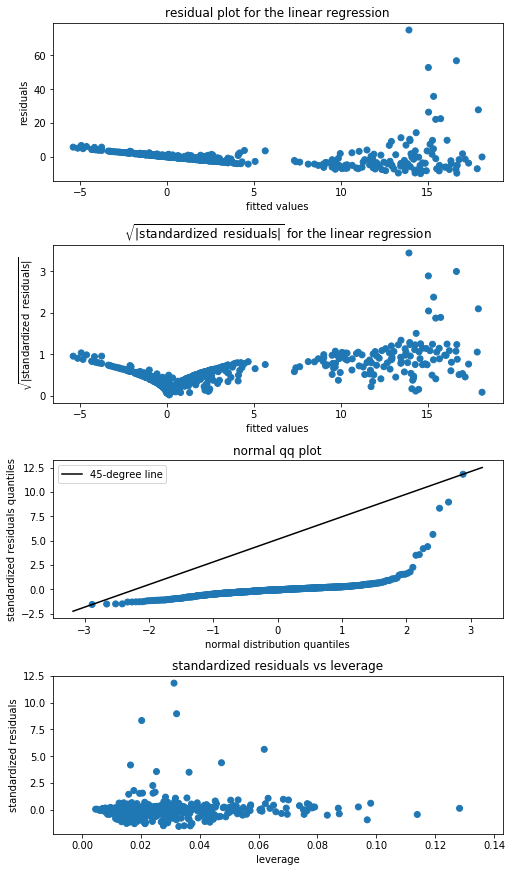

In [4]:
df_X = df[descriptiveColumns]
model = sm.OLS(df_Y, df_X)
fitted = model.fit()
fitted.summary()
createResidualPlots(df_X, df_Y, fitted_model=fitted)
params_multiple = fitted.params

<p>We can reject the null hypothesis for the $\mathrm{zn}$, $\mathrm{dis}$, $\mathrm{rad}$, $\mathrm{black}$, $\mathrm{lstat}$ and $\mathrm{medv}$ with $\alpha = 10 \%$. Furthermore, the residual plots show a clear pattern in the data, and the qq plot provides strong evidence that their distribution doesn't follow the normal distribution.</p>

<h3>Exercise 3.15.3</h3>
<blockquote>
    <i>How do your results from 1 compare to your results from 2? Create a plot displaying the univariate regression coefficients from 1 on the $x$-axis, and the multiple regression coefficients from 2 on the $y$-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the $x$-axis, and its coefficient estimate in the multiple linear regression model is shown on the $y$-axis.</i>
</blockquote>

/home/floris/.local/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  func(*args, **kwargs)
/home/floris/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


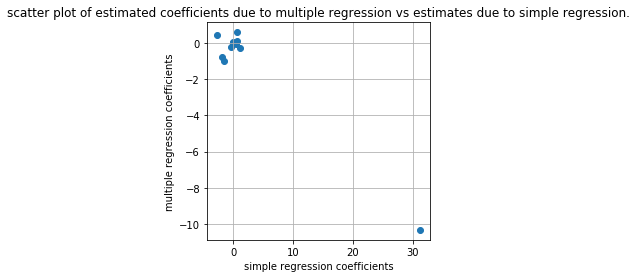

In [5]:
params_multiple.drop('Intercept', inplace=True)
params_simple = pd.Series(params_simple).reindex(params_multiple.index)
fig, ax = plt.subplots(constrained_layout=True, figsize=(4, 4))
_ = ax.scatter(params_simple, params_multiple)
_ = ax.set_xlabel('simple regression coefficients')
_ = ax.set_ylabel('multiple regression coefficients')
_ = ax.grid(True)
_ = ax.set_title('scatter plot of estimated coefficients due to multiple regression vs estimates due to simple regression.')

<p>The outlier shown in the above plot is the estimated coefficient for $\mathrm{nox}. It is interesting to see that the estimate slope is positive for the simple regression, and negative for the multiple regression.</p>

<h3>Exercise 3.15.4</h3>
<blockquote>
    <i>Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form
$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon \,.
$$</i>
</blockquote>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.28e-06
Time:                        15:30:28   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8461      0.433     11.192      0.000       3.995       5.697
zn            -0.3322      0.110     -3.025      0.003      -0.548      -0.116
zn_squared     0.0065      0.004      1.679      0.094      -0.001       0.014
zn_cubed   -3.776e-05   3.14e-05     -1.203      0.230   -9.94e-05    2.39e-05
==============================================================================
Omnibus:                      569.133   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33700.991
Skew:                           5.272   Prob(JB):                         0.00
Kurtosis:                      41.565   Cond. No.                     1.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.55e-32
Time:                        15:30:28   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.6626      1.574      2.327      0.020       0.570       6.755
indus            -1.9652      0.482     -4.077      0.000      -2.912      -1.018
indus_squared     0.2519      0.039      6.407      0.000       0.175       0.329
indus_cubed      -0.0070      0.001     -7.292      0.000      -0.009      -0.005
==============================================================================
Omnibus:                      611.788   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51742.286
Skew:                           5.820   Prob(JB):                         0.00
Kurtosis:                      51.153   Cond. No.                     2.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sat, 04 Jan 2020   Prob (F-statistic):              0.209
Time:                        15:30:28   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7444      0.396      9.453      0.000       2.966       4.523
chas            -0.6309      0.502     -1.257      0.209      -1.617       0.355
chas_squared    -0.6309      0.502     -1.257      0.209      -1.617       0.355
chas_cubed      -0.6309      0.502     -1.257      0.209      -1.617       0.355
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                     5.68e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           3.81e-38
Time:                        15:30:28   Log-Likelihood:                -1717.2
No. Observations:                 506   AIC:                             3442.
Df Residuals:                     502   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     233.0866     33.643      6.928      0.000     166.988     299.185
nox         -1279.3713    170.397     -7.508      0.000   -1614.151    -944.591
nox_squared  2248.5441    279.899      8.033      0.000    1698.626    2798.462
nox_cubed   -1245.7029    149.282     -8.345      0.000   -1538.997    -952.409
==============================================================================
Omnibus:                      614.412   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53523.997
Skew:                           5.851   Prob(JB):                         0.00
Kurtosis:                      52.008   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.17
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.07e-07
Time:                        15:30:28   Log-Likelihood:                -1788.6
No. Observations:                 506   AIC:                             3585.
Df Residuals:                     502   BIC:                             3602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.6246     64.517      1.746      0.081     -14.132     239.382
rm           -39.1501     31.311     -1.250      0.212    -100.668      22.368
rm_squared     4.5509      5.010      0.908      0.364      -5.292      14.394
rm_cubed      -0.1745      0.264     -0.662      0.509      -0.693       0.344
==============================================================================
Omnibus:                      585.097   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40144.207
Skew:                           5.465   Prob(JB):                         0.00
Kurtosis:                      45.245   Cond. No.                     5.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.02e-20
Time:                        15:30:28   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5488      2.769     -0.920      0.358      -7.989       2.892
age             0.2737      0.186      1.468      0.143      -0.093       0.640
age_squared    -0.0072      0.004     -1.988      0.047      -0.014    -8.4e-05
age_cubed    5.745e-05   2.11e-05      2.724      0.007     1.6e-05    9.89e-05
==============================================================================
Omnibus:                      577.477   Durbin-Watson:                   1.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39586.670
Skew:                           5.336   Prob(JB):                         0.00
Kurtosis:                      44.997   Cond. No.                     4.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     64.37
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           3.14e-35
Time:                        15:30:29   Log-Likelihood:                -1724.0
No. Observations:                 506   AIC:                             3456.
Df Residuals:                     502   BIC:                             3473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      30.0476      2.446     12.285      0.000      25.242      34.853
dis           -15.5544      1.736     -8.960      0.000     -18.965     -12.144
dis_squared     2.4521      0.346      7.078      0.000       1.771       3.133
dis_cubed      -0.1186      0.020     -5.814      0.000      -0.159      -0.079
==============================================================================
Omnibus:                      577.742   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42444.706
Skew:                           5.305   Prob(JB):                         0.00
Kurtosis:                      46.596   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           2.31e-55
Time:                        15:30:29   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6055      2.050     -0.295      0.768      -4.633       3.422
rad             0.5127      1.044      0.491      0.623      -1.538       2.563
rad_squared    -0.0752      0.149     -0.506      0.613      -0.367       0.217
rad_cubed       0.0032      0.005      0.703      0.482      -0.006       0.012
==============================================================================
Omnibus:                      659.751   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77838.247
Skew:                           6.526   Prob(JB):                         0.00
Kurtosis:                      62.343   Cond. No.                     5.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     97.80
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           7.34e-50
Time:                        15:30:29   Log-Likelihood:                -1689.9
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     502   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.1836     11.796      1.626      0.105      -3.991      42.358
tax            -0.1533      0.096     -1.602      0.110      -0.341       0.035
tax_squared     0.0004      0.000      1.488      0.137      -0.000       0.001
tax_cubed   -2.204e-07   1.89e-07     -1.167      0.244   -5.91e-07    1.51e-07
==============================================================================
Omnibus:                      644.161   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69773.212
Skew:                           6.278   Prob(JB):                         0.00
Kurtosis:                      59.141   Cond. No.                     6.16e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.48
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           4.17e-13
Time:                        15:30:29   Log-Likelihood:                -1775.8
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         477.1840    156.795      3.043      0.002     169.129     785.239
ptratio           -82.3605     27.644     -2.979      0.003    -136.673     -28.048
ptratio_squared     4.6353      1.608      2.882      0.004       1.475       7.795
ptratio_cubed      -0.0848      0.031     -2.743      0.006      -0.145      -0.024
==============================================================================
Omnibus:                      572.356   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36070.763
Skew:                           5.294   Prob(JB):                         0.00
Kurtosis:                      42.985   Cond. No.                     3.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     29.49
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.41e-17
Time:                        15:30:29   Log-Likelihood:                -1765.3
No. Observations:                 506   AIC:                             3539.
Df Residuals:                     502   BIC:                             3555.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        18.2637      2.305      7.924      0.000      13.735      22.792
black            -0.0836      0.056     -1.483      0.139      -0.194       0.027
black_squared     0.0002      0.000      0.716      0.474      -0.000       0.001
black_cubed   -2.652e-07   4.36e-07     -0.608      0.544   -1.12e-06    5.92e-07
==============================================================================
Omnibus:                      591.816   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43468.746
Skew:                           5.544   Prob(JB):                         0.00
Kurtosis:                      47.032   Cond. No.                     3.59e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.35e-26
Time:                        15:30:29   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2010      2.029      0.592      0.554      -2.785       5.187
lstat            -0.4491      0.465     -0.966      0.335      -1.362       0.464
lstat_squared     0.0558      0.030      1.852      0.065      -0.003       0.115
lstat_cubed      -0.0009      0.001     -1.517      0.130      -0.002       0.000
==============================================================================
Omnibus:                      607.734   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53621.219
Skew:                           5.726   Prob(JB):                         0.00
Kurtosis:                      52.114   Cond. No.                     5.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           4.45e-59
Time:                        15:30:30   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       53.1655      3.356     15.840      0.000      46.571      59.760
medv            -5.0948      0.434    -11.744      0.000      -5.947      -4.242
medv_squared     0.1555      0.017      9.046      0.000       0.122       0.189
medv_cubed      -0.0015      0.000     -7.312      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      569.730   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47929.717
Skew:                           5.106   Prob(JB):                         0.00
Kurtosis:                      49.573   Cond. No.                     3.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


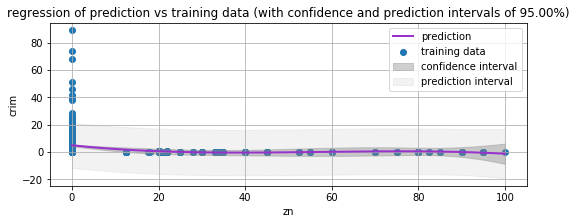

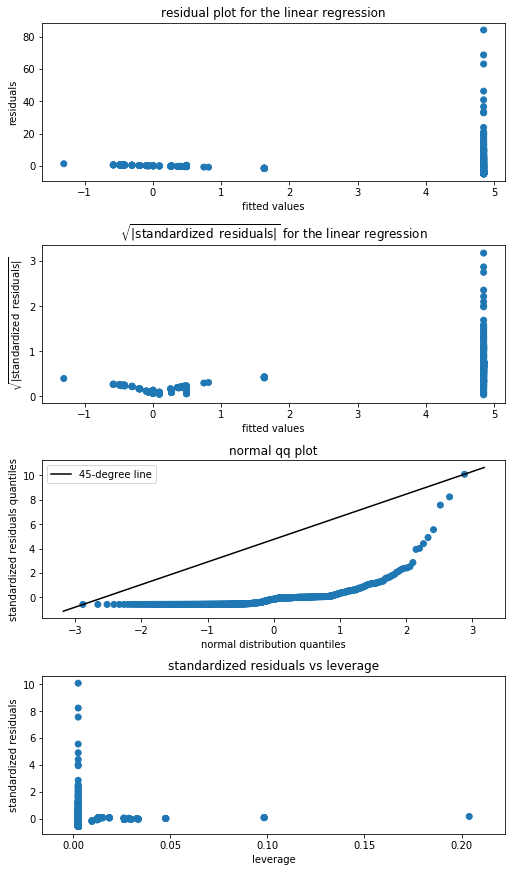

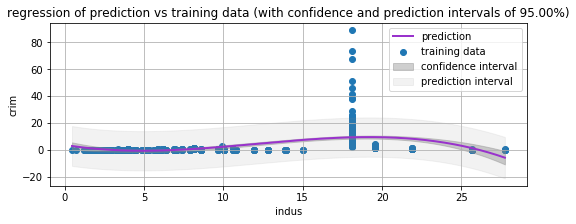

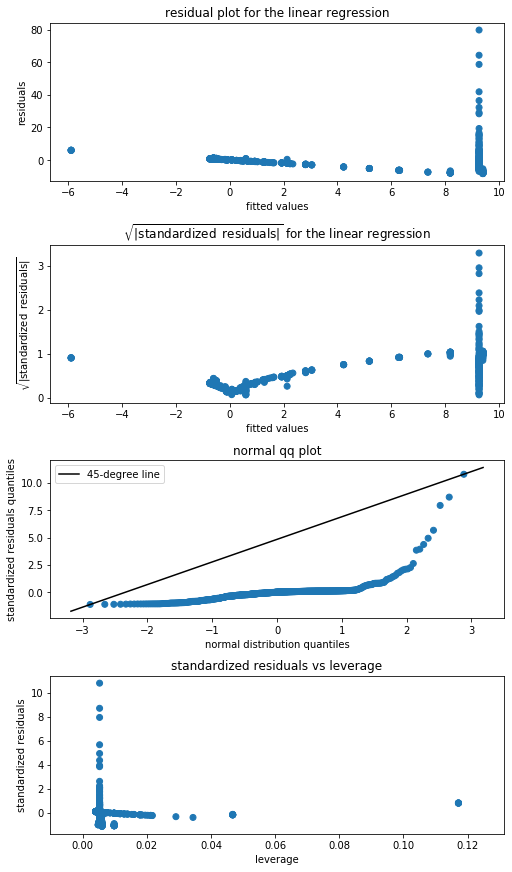

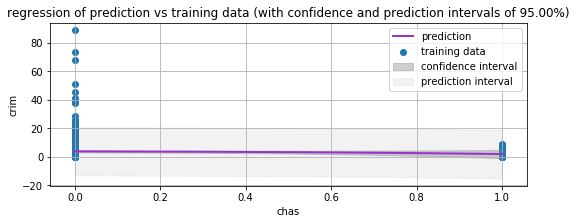

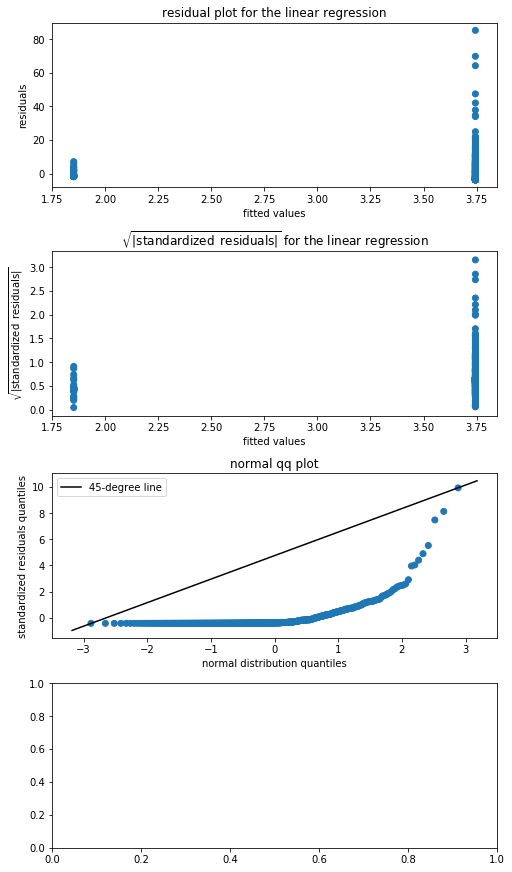

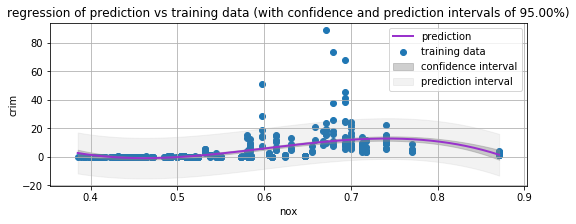

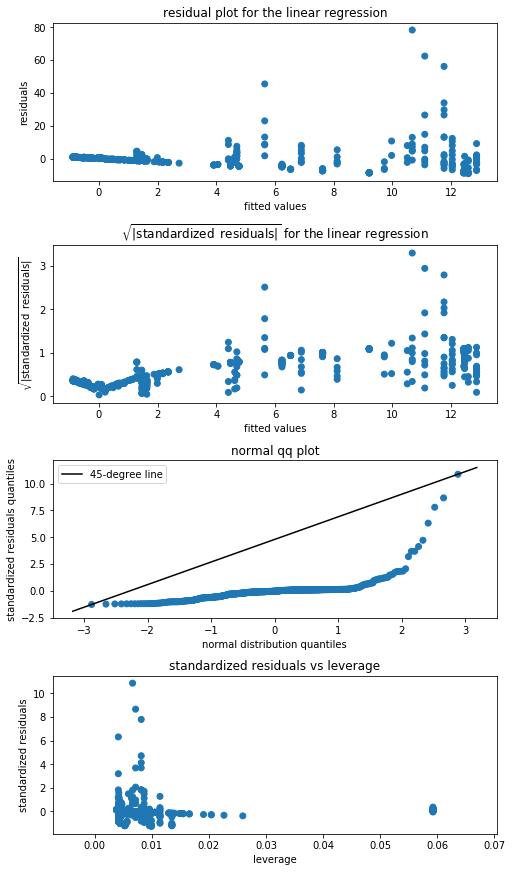

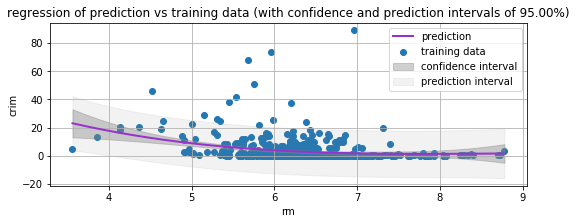

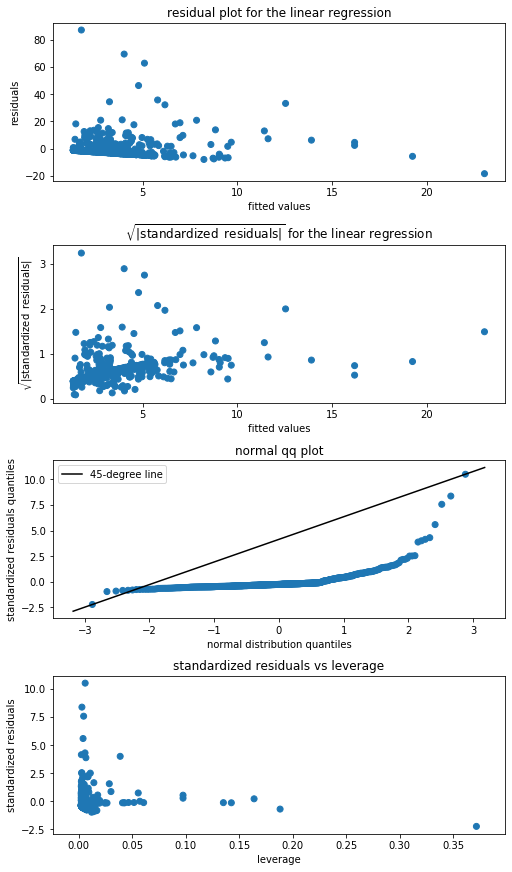

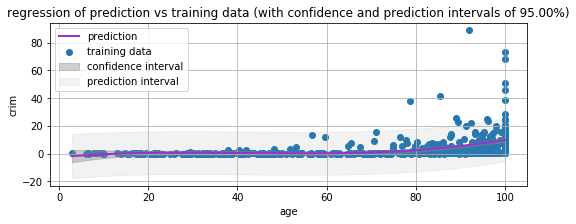

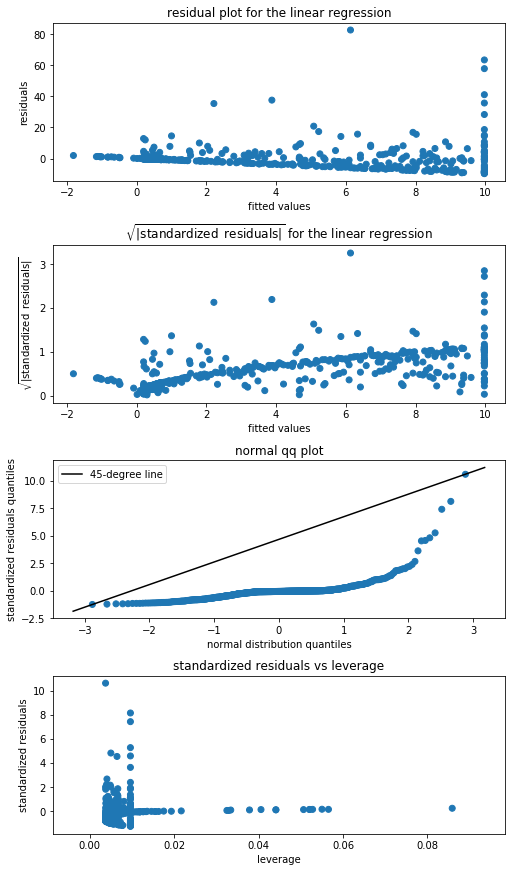

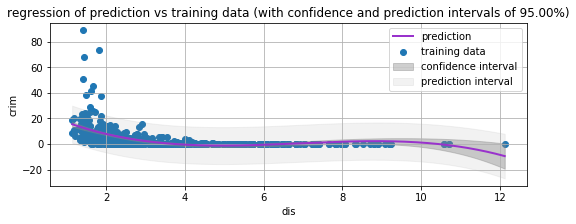

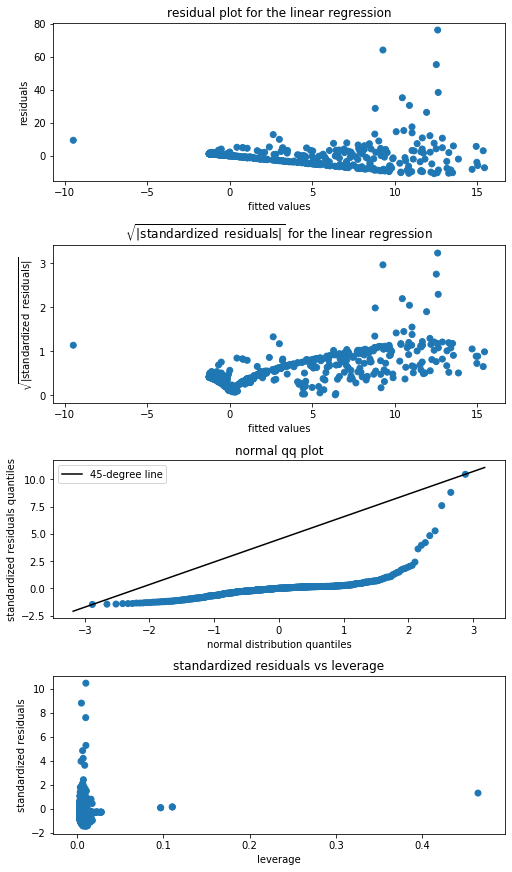

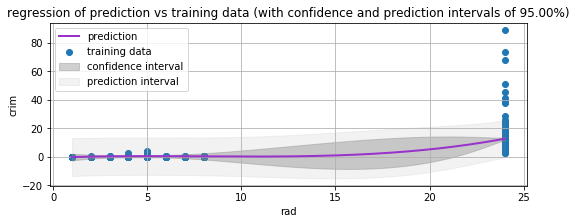

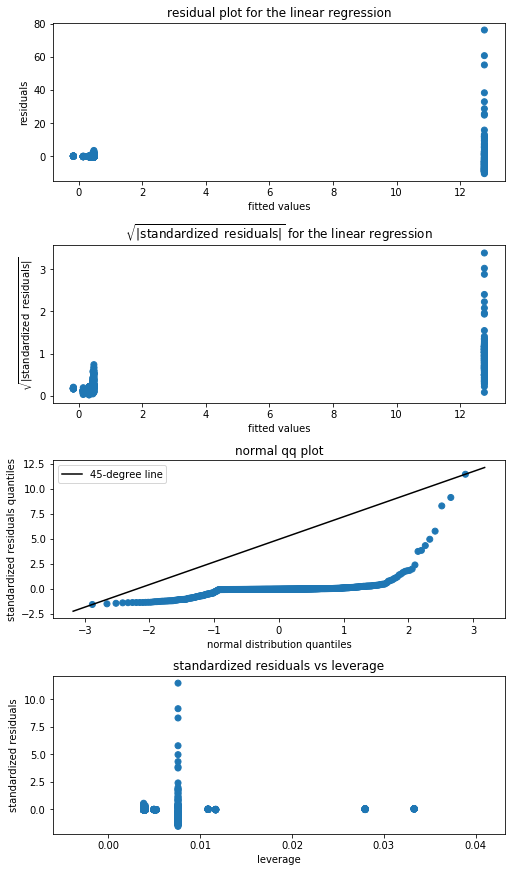

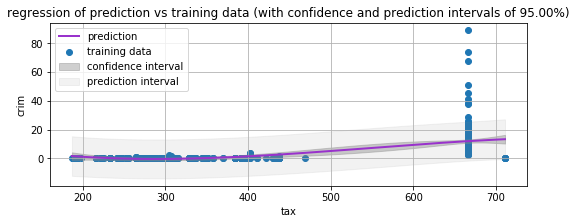

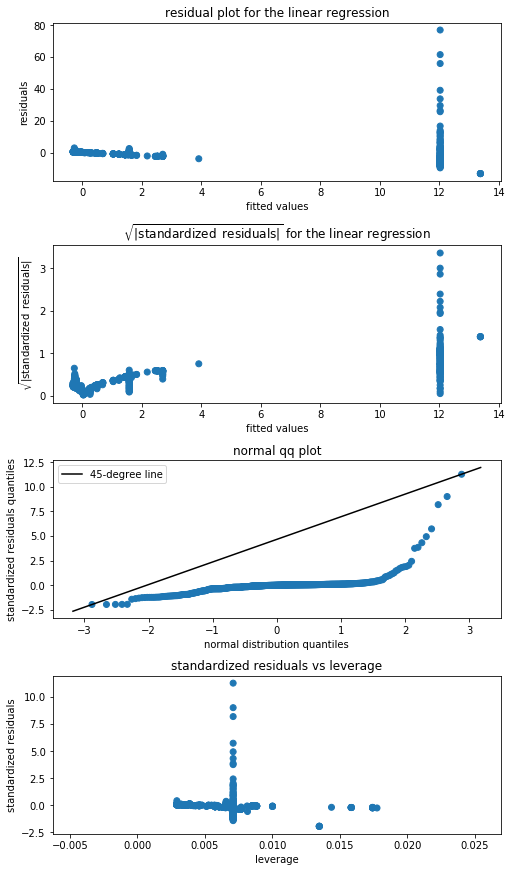

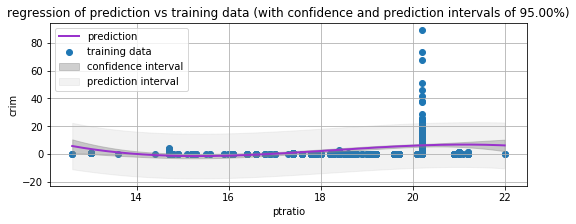

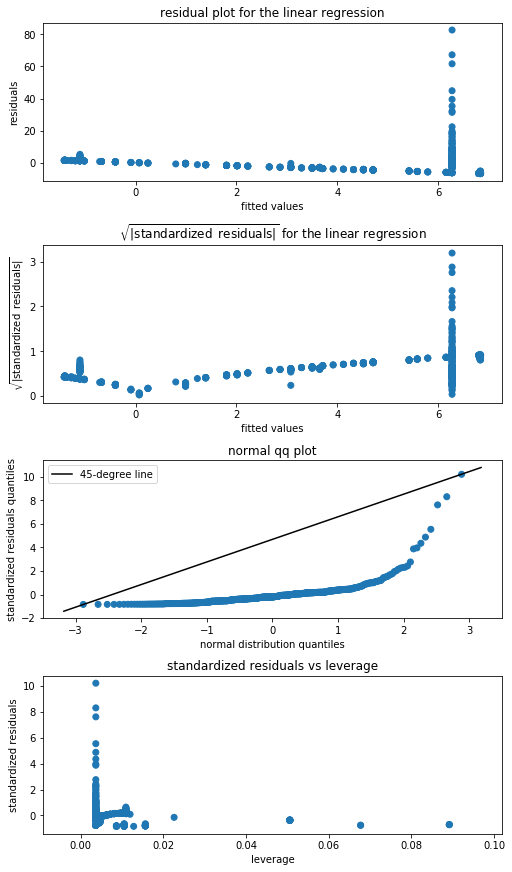

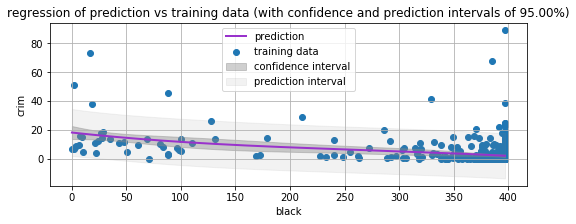

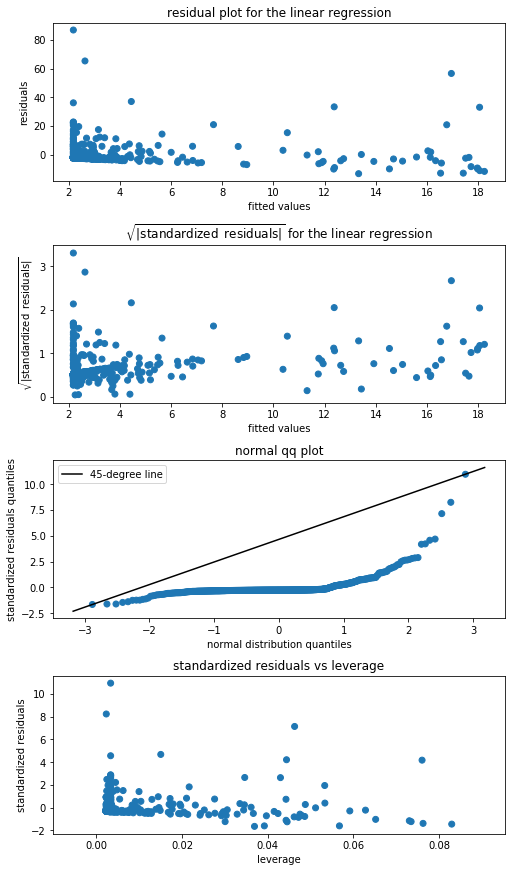

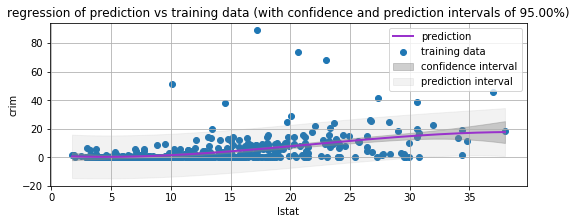

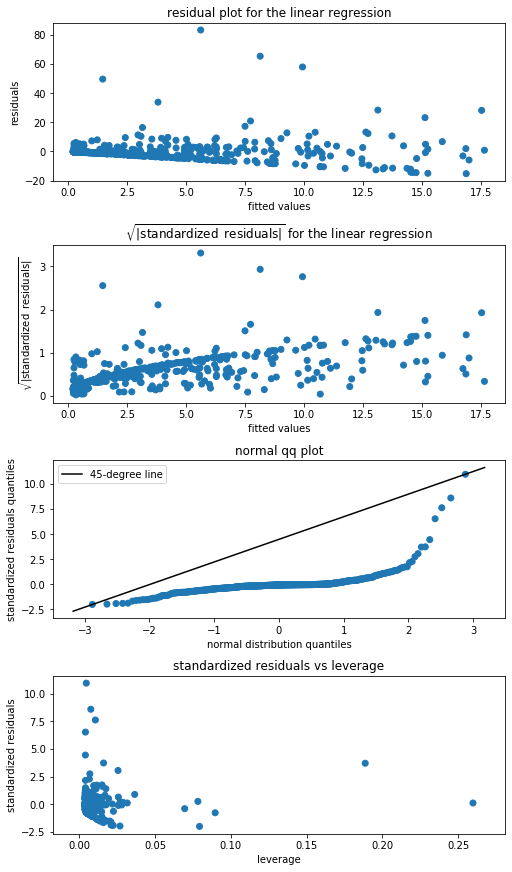

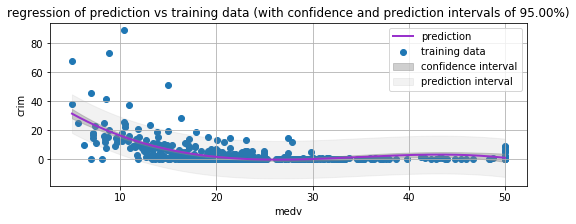

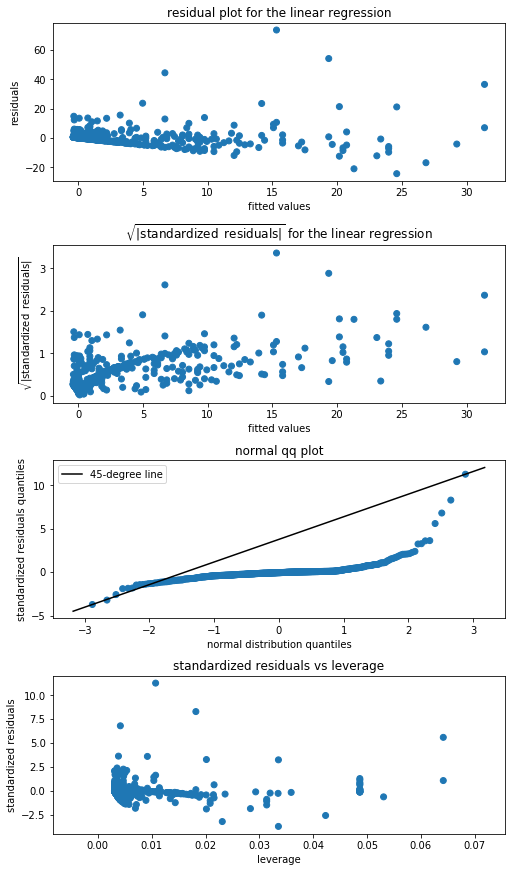

In [6]:
r_squared_polynomial = {'r_squared': {}, 'adj_r_squared': {}} # will use this to create a pandas Series later
df_Y = df[targetColumn]
for variable_name in descriptiveColumns:
    if variable_name == 'Intercept':
        continue
    
    df_X = df[['Intercept', variable_name]].copy()
    df_X[variable_name + '_squared'] = df_X[variable_name]**2
    df_X[variable_name + '_cubed'] = df_X[variable_name]**3
    polynomialMap = {
        variable_name: 1,
        variable_name + '_squared': 2,
        variable_name + '_cubed': 3,
    }
    model = sm.OLS(df_Y, df_X)
    fitted = model.fit()
    fitted.summary()
    createLinearRegressionPlot(df_X, df_Y, fitted_model=fitted, width=8, polynomialMap=polynomialMap)
    createResidualPlots(df_X, df_Y, fitted_model=fitted)

    r_squared_polynomial['r_squared'][variable_name] = fitted.rsquared
    r_squared_polynomial['adj_r_squared'][variable_name] = fitted.rsquared_adj

<p>To gain a visual insight into the fit of each model, we plot the $R^2$ and adjusted $R^2$ displaying the simple linear regression coefficients from 3.15.1 on the $x$-axis, and the polynomial regression coefficients on the $y$-axis. That is, each (adjusted) $R^2$ is displayed as a single point in the plot. Their values from the simple linear regression model are shown on the $x$-axis, and their values from the polynomial regression model is shown on the $y$-axis.</p>

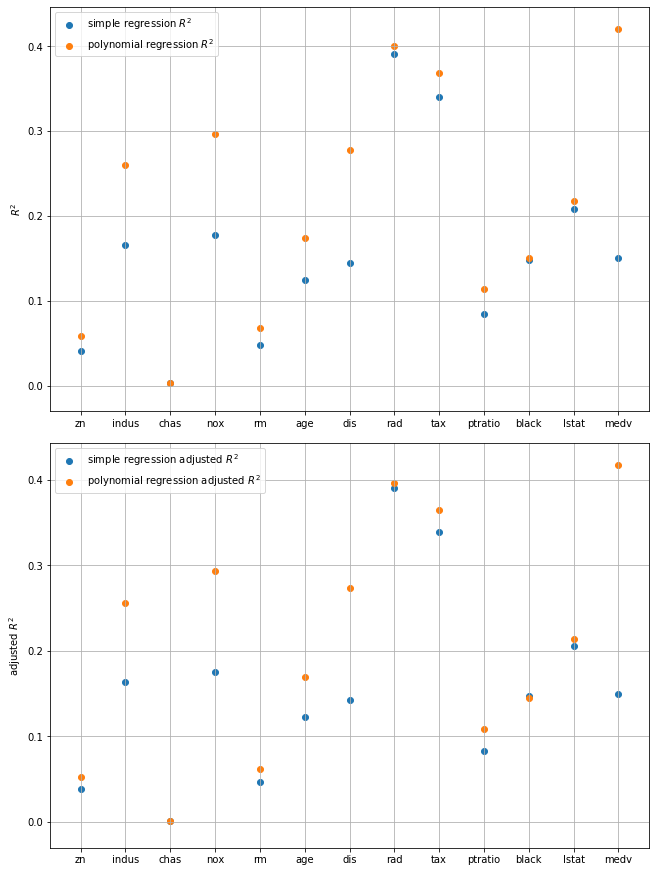

In [7]:
fig, [ax1, ax2] = plt_func.subplots(2, 1, constrained_layout=True, figsize=(9, 12))

_ = ax1.scatter(r_squared_simple['r_squared'].keys(), r_squared_simple['r_squared'].values(), label=r'simple regression $R^2$')
_ = ax1.scatter(r_squared_polynomial['r_squared'].keys(), r_squared_polynomial['r_squared'].values(), label=r'polynomial regression $R^2$')
_ = ax1.set_ylabel(r'$R^2$')
_ = ax1.grid(True)
_ = ax1.legend()


_ = ax2.scatter(r_squared_simple['adj_r_squared'].keys(), r_squared_simple['adj_r_squared'].values(), label=r'simple regression adjusted $R^2$')
_ = ax2.scatter(r_squared_polynomial['adj_r_squared'].keys(), r_squared_polynomial['adj_r_squared'].values(), label=r'polynomial regression adjusted $R^2$')
_ = ax2.set_ylabel(r'adjusted $R^2$')
_ = ax2.grid(True)
_ = ax2.legend()

y1_min, y1_max = ax1.get_ylim()
y2_min, y2_max = ax2.get_ylim()
y_min = min([y1_min, y2_min])
y_max = max([y1_max, y2_max])
_ = ax1.set_ylim(y_min, y_max)
_ = ax1.set_ylim(y_min, y_max)

<p>So overall it seems that the polynomial is a better fit. However, to test the predictive value of the models, their performance should be measured with out-of-sample data.</p>